In [1]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import time
import random

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
wv = np.load('./model/wv.npy')
vocab = []
with open('./data/common_word_list.txt', encoding = 'utf-8') as f:
    for line in f.readlines():
        vocab.append(line.strip())
print(vocab[:10])
print(wv[:10])
print("-"*40)
print("词表大小：", len(vocab), "词向量矩阵大小：",wv.shape)

['一', '一一', '一丁点儿', '一下', '一专多能', '一世', '一丘之貉', '一丝不挂', '一丝不苟', '一个心眼儿']
[[ 0.12077881  0.01579624 -0.16018876 ...  0.14167114  0.043945
  -0.08207788]
 [-0.1587381   0.2181573  -0.20078327 ...  0.06095327  0.09027559
   0.13185246]
 [ 0.28895995  0.32369     0.00986398 ... -0.1749011  -0.10420036
  -0.08039057]
 ...
 [-0.07374783 -0.35918233  0.23576638 ...  0.06894048 -0.53702134
   0.2312663 ]
 [ 0.1194022  -0.01366967 -0.3884288  ...  0.20233642 -0.07473911
   0.16539133]
 [ 0.23417552 -0.0485241  -0.0285177  ...  0.03321343 -0.00941553
  -0.13841018]]
--------------------
词表大小： 54639 词向量矩阵大小： (54639, 256)


In [9]:
animals = []
with open('./class/animals.txt', encoding='utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        animals.append(word)

In [10]:
print(animals[:20], len(animals))

['中华鲟', '凤蝶', '黄鼬', '蝎子', '田螺', '鸭子', '雨燕', '孔雀', '水母', '棕熊', '清道夫', '海鸥', '猩猩', '羚羊', '公鸡', '家兔', '蜜蜂', '海马', '水蛭', '绵羊'] 225


In [11]:
label = np.zeros(len(vocab))
cnt = 0
for word in animals:
    if word not in vocab:
        print(word)
        cnt+=1
    else:
        i = vocab.index(word)
        label[i] = 1

In [12]:
cnt

0

In [13]:
label.shape

(54639,)

In [14]:
r_model = linear_model.LinearRegression()
r_model.fit(wv, label)
display(r_model.intercept_) 
display(r_model.coef_)

0.008203542

array([ 3.37143219e-03,  7.59397866e-03,  7.12417625e-03,  7.19889300e-03,
       -6.80115772e-03,  1.74696301e-03,  6.74900319e-03, -3.36437300e-03,
       -6.58002496e-03, -9.56144650e-03, -1.58464140e-03, -7.68308993e-03,
       -3.95111740e-04,  2.70563643e-03,  6.33305777e-03,  1.60839688e-03,
       -4.30214452e-03, -1.00579830e-02,  7.36696506e-03,  6.18878845e-03,
       -1.67191476e-02, -1.89961307e-03,  4.09199903e-03, -1.91708328e-03,
       -7.89256394e-03,  9.63630620e-03,  3.67200701e-03, -7.66294263e-03,
        1.32739416e-03,  3.31147644e-03,  5.00795292e-03, -3.71835195e-04,
       -7.29590189e-03,  3.21316323e-03,  2.85523059e-03,  1.71509385e-03,
       -1.69181637e-03, -3.65174864e-03,  7.91007653e-03, -5.77621348e-03,
       -3.24667012e-03,  1.67427131e-03,  1.96706830e-03,  8.07293784e-03,
        7.23438058e-03,  8.18098150e-03, -7.02684931e-03, -5.14367223e-03,
        5.55280410e-03,  3.28208460e-03,  1.35507276e-02, -1.28480839e-03,
       -6.08246448e-03, -

In [15]:
r_model.coef_.shape

(256,)

In [16]:
weights = r_model.coef_
bias = r_model.intercept_

Picture has been saved as ./pics/animals_weight_210403_1613.png.


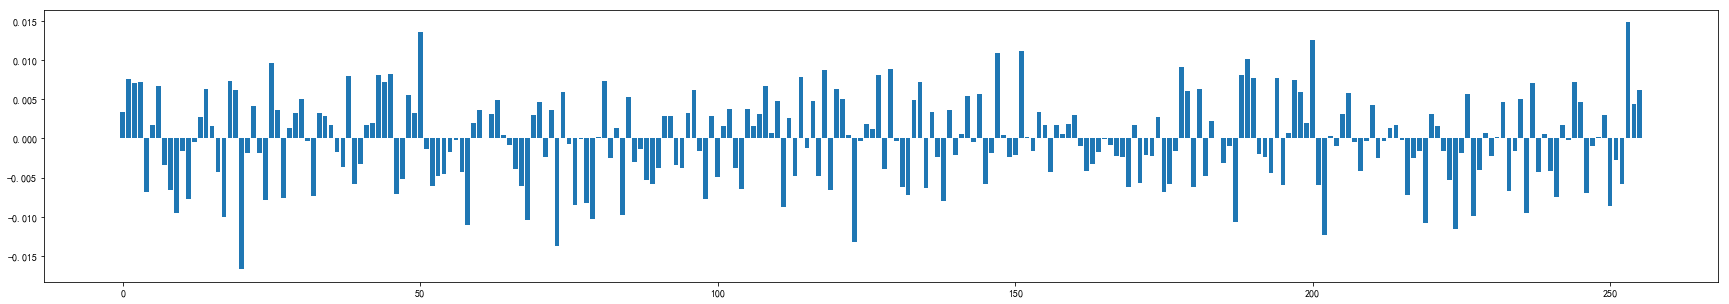

In [17]:
# weights in each dimensions
file_name = f'./pics/animals_weight_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 5))
plt.bar(x, r_model.coef_)
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}.')
plt.show()

Picture has been saved as ./pics/animals_samples_210403_1618.png.


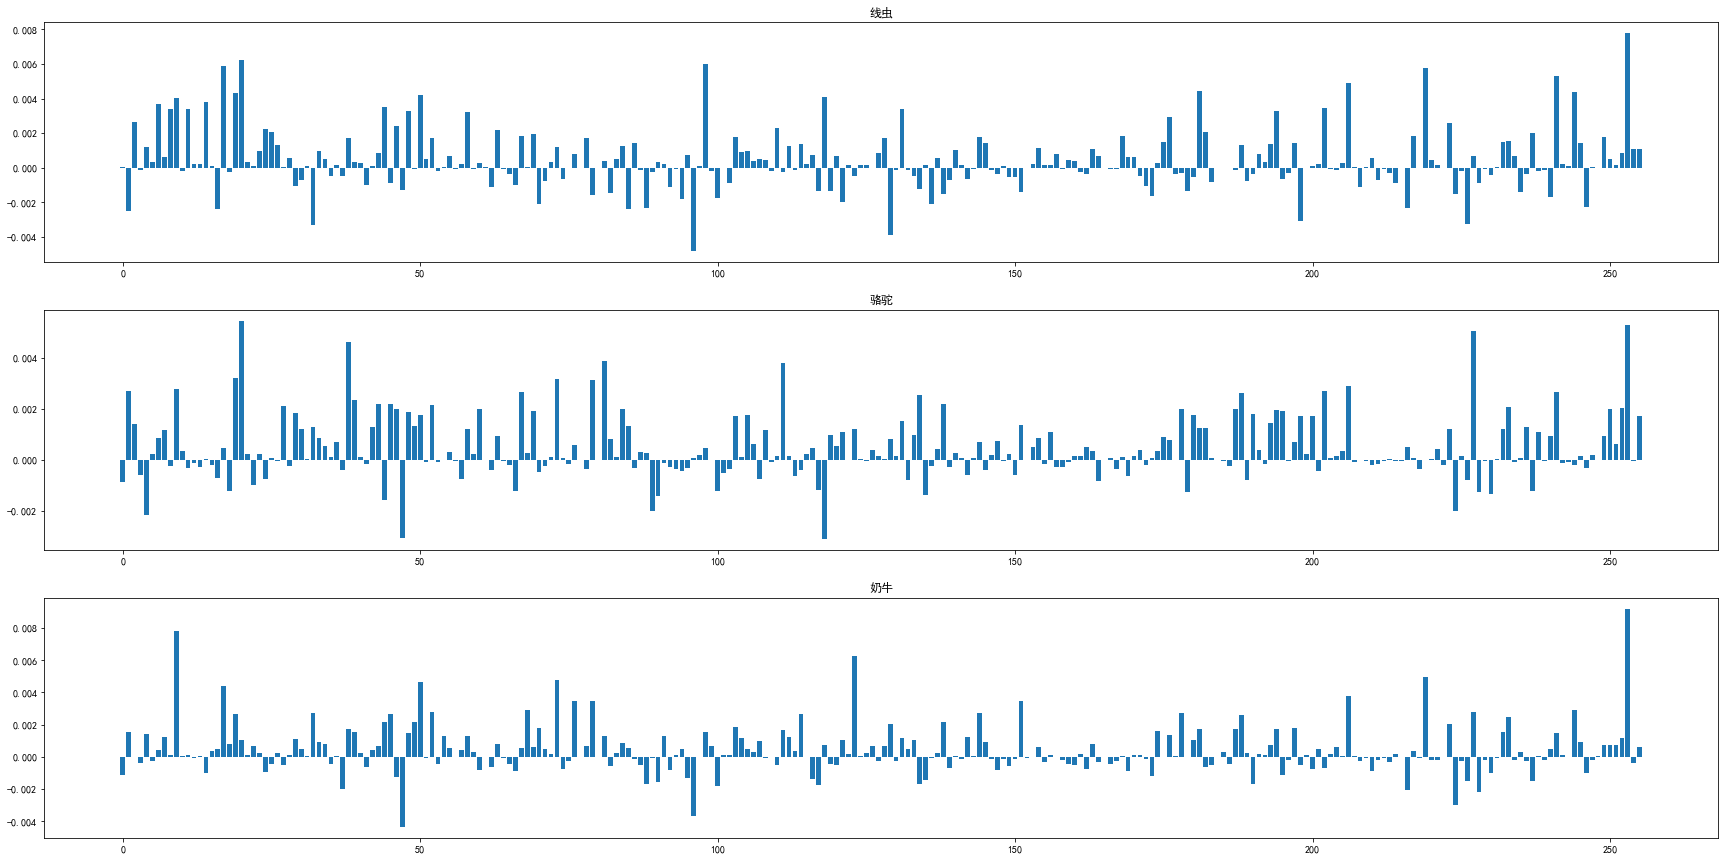

In [20]:
# samples
file_name = f'./pics/animals_samples_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 15))
random_sample = random.sample(animals, 3)
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.title(random_sample[i])
    plt.bar(x, weights*wv[vocab.index(random_sample[i])])
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [21]:
# 词向量*权重热力图
animals_wv = []
for word in animals:
    animals_wv.append(wv[vocab.index(word)])
animals_wv = np.array(animals_wv)
animals_wv.shape

(225, 256)

In [22]:
pre_mat = animals_wv*weights
pre_avg = np.mean(pre_mat, axis=0)
pre_avg.shape

(256,)

Picture has been saved as ./pics/animals_heatmap_words_210403_1621.png.


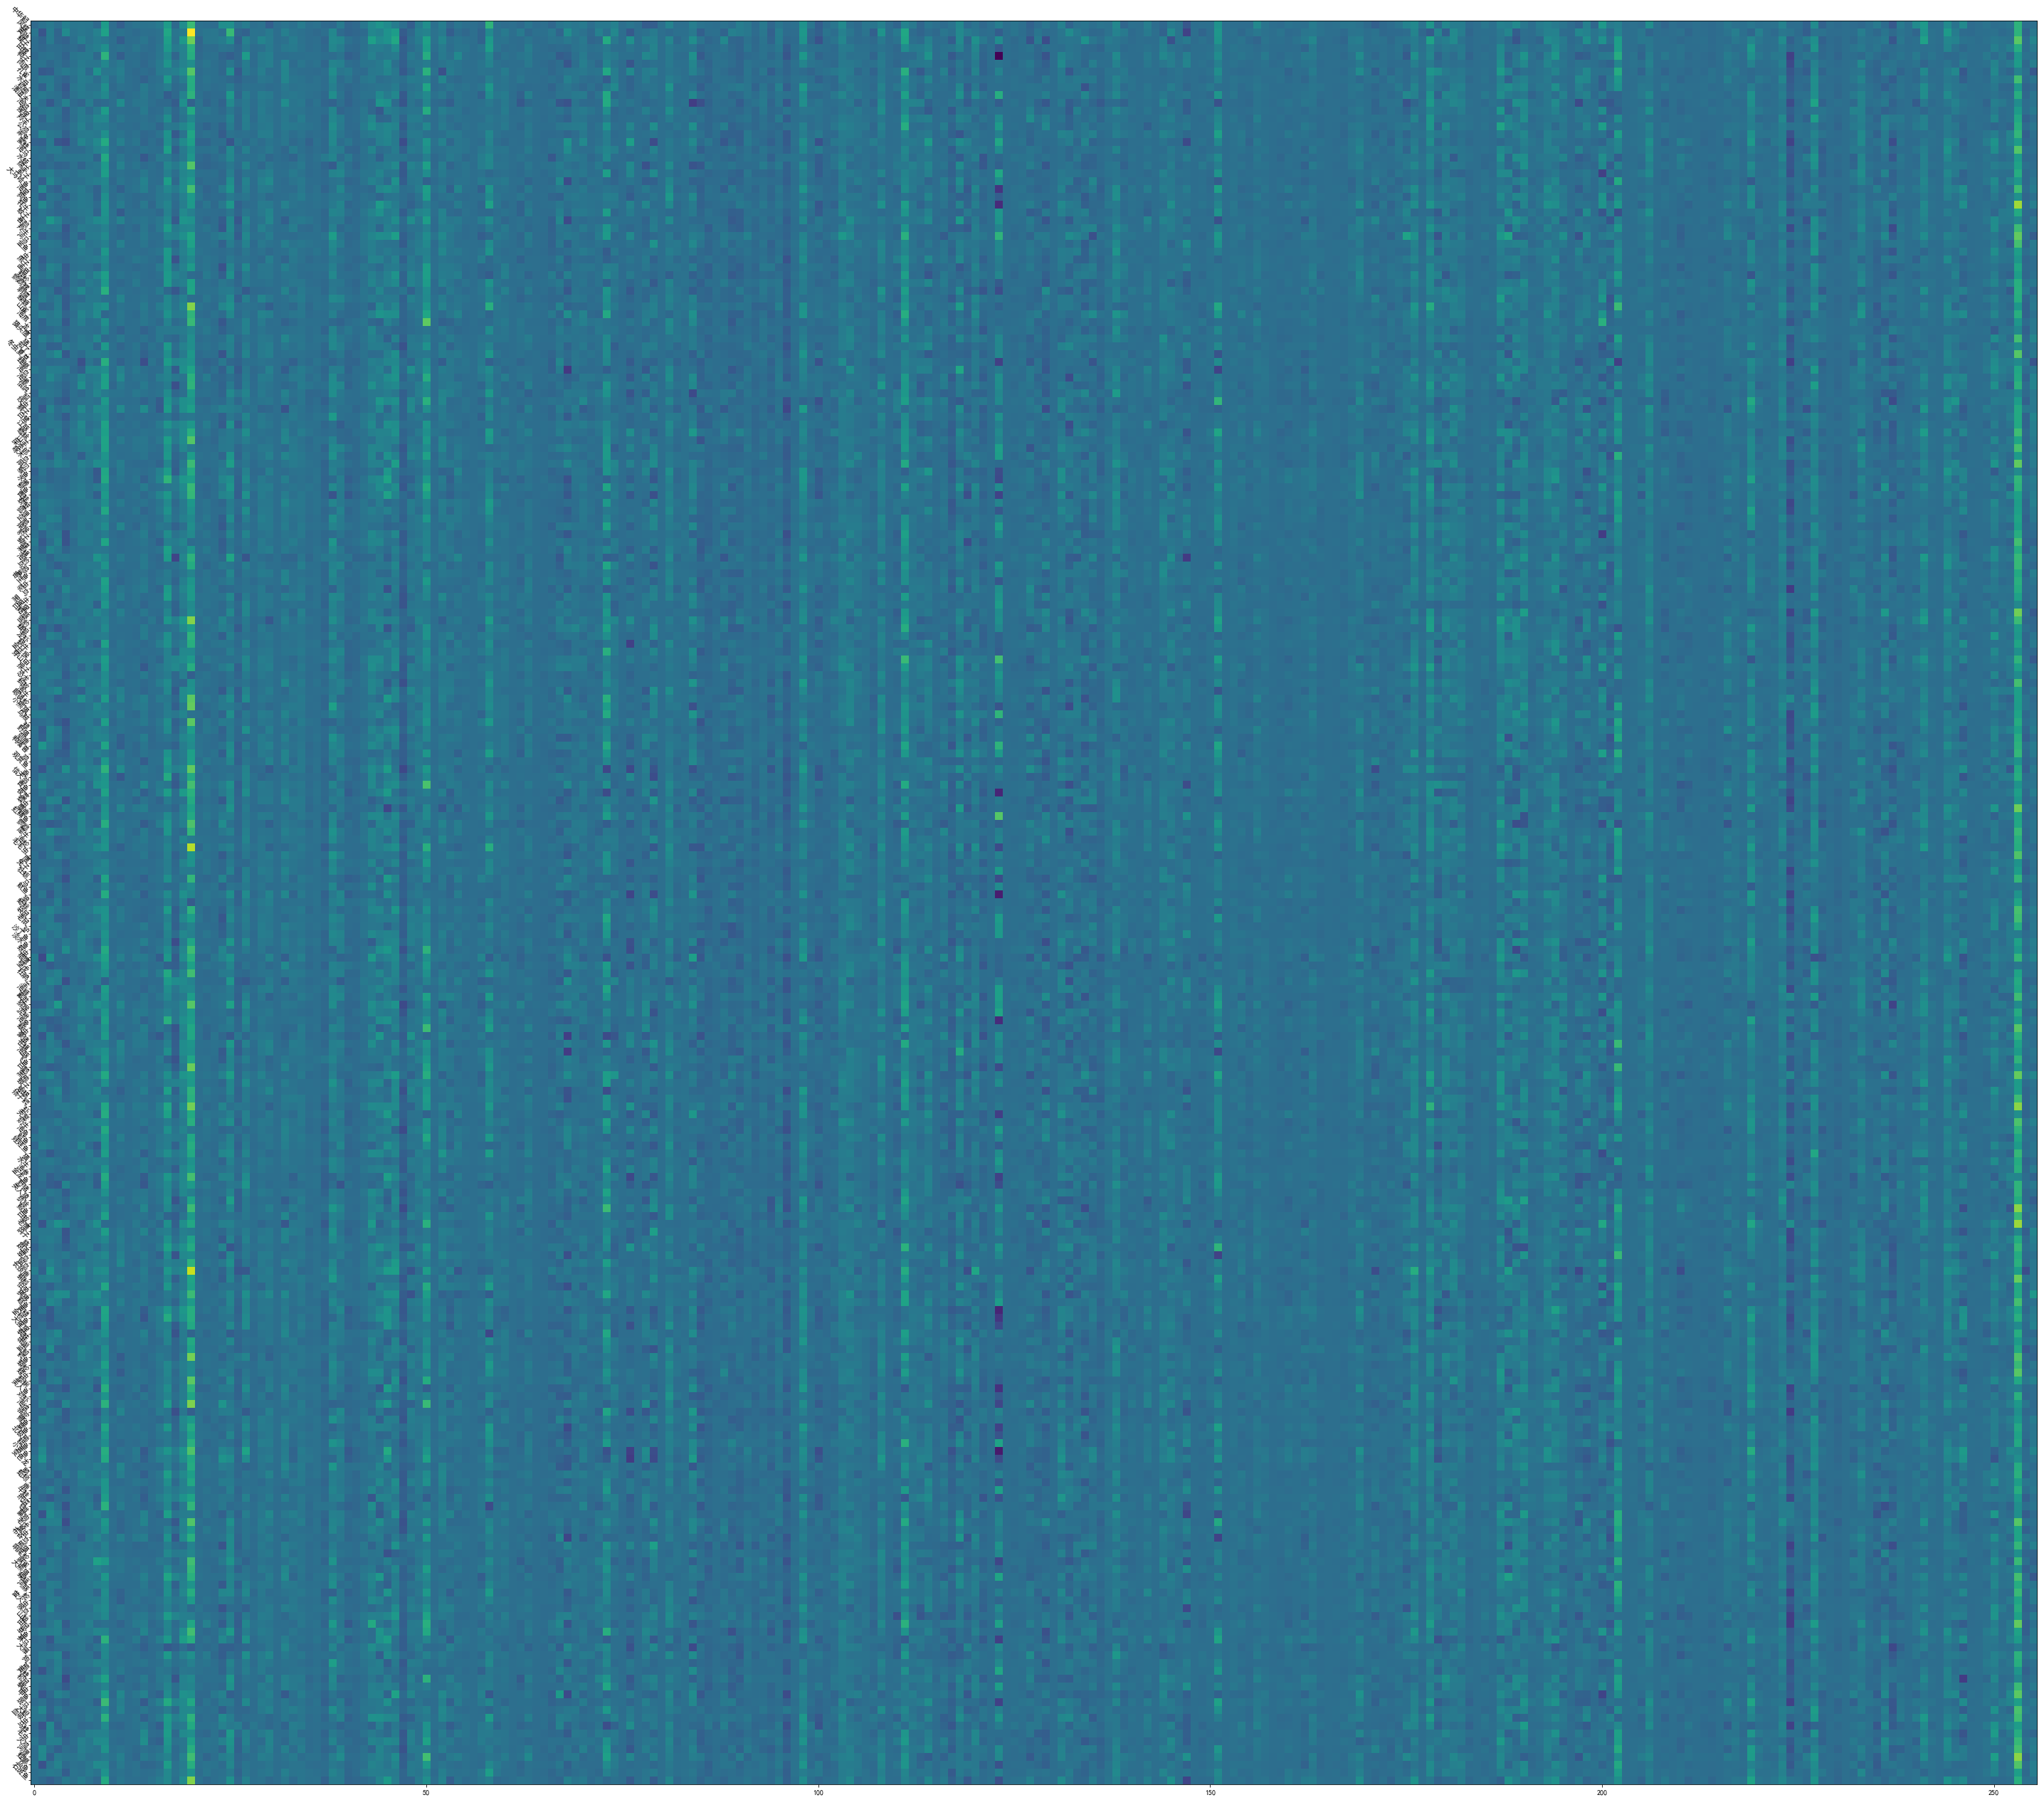

In [23]:
# Heatmap
file_name = f'./pics/animals_heatmap_words_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig, ax = plt.subplots(figsize=(40, 40))
im = ax.imshow(pre_mat)
ax.set_yticks(np.arange(len(animals)))
ax.set_yticklabels(animals)
plt.setp(ax.get_yticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
fig.tight_layout()
# plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [25]:
print(np.argsort(-pre_avg))
print(pre_avg[np.argsort(-pre_avg)[:10]])

[253  20   9  50 111 202  17 227  73 178 219  98  58 187  19 151 176  25
  38  46 241 206 244 223 138 108 190 194  81 103 250  45 233  43 193  27
  44 118 104 169 144 123 182 131 114  84  52 120 181 180   6  39 189   8
 145  32  49   7  30  29 188  34 200 245 236 112 163 156  63 195  48   2
 216 255  60 217  70 142  79 105 198 252  54  69  95 137  33  11  78  74
 116  91  42 175   3 133 168 232 153  16  59 157 240  93 146  14 246 238
 135 106 174 251 220 113 127 192  72 185  67  53  57 147 197 249 154  83
   5  36 205 222  13 242  88 150 162 204 171  97  22 140   1 126 132 139
 160 225  82 161  24 221  55 179  99 102 191 125 209 208 234 231 124  23
 165 152 134  56 218 248 184  80 141  71 207 247  21 203  61 148 166  77
 122 212 239  12 177 215  31 199  68 130 143 243 170   0  87 158  35  51
 172 109 186 229 167  62 211 173  28 149  64 164 213 128  10  75  65  76
 159 115  15 226 155 129 210  18 110 107 196 119 101 183 214  66 228  89
 201  41  92 235 100  90  40 230 254  94  37 121  8

In [38]:
animals_sample = random.sample(animals, 10)
animals_sample_wv = []
for i in animals_sample:
    t = [wv[vocab.index(i)][253], wv[vocab.index(i)][20], wv[vocab.index(i)][9]]
    animals_sample_wv.append(t)
animals_sample_wv = np.array(animals_sample_wv)
print(animals_sample, animals_sample_wv)

['蝉', '海豚', '河狸', '黑熊', '鹿', '凤蝶', '飞蛾', '燕子', '萤火虫', '甲鱼'] [[ 0.43903717 -0.37057656 -0.2017155 ]
 [ 0.6174883  -0.42910448 -0.55023813]
 [ 0.99348193 -0.629484   -0.1652701 ]
 [ 0.39782953 -0.33902207 -0.4791764 ]
 [ 0.5612788  -0.1851701  -0.5302864 ]
 [ 0.606228   -1.2138314  -0.69367856]
 [ 0.29188547 -0.11349221 -0.09672445]
 [ 0.48076388 -0.34261143 -0.29709145]
 [ 0.5528767   0.02864632 -0.40274644]
 [ 0.4237711  -0.4463589  -1.0553772 ]]


In [39]:
common_sample = random.sample(vocab, 10)
common_sample_wv = []
for i in common_sample:
    t = [wv[vocab.index(i)][253], wv[vocab.index(i)][20], wv[vocab.index(i)][9]]
    common_sample_wv.append(t)
common_sample_wv = np.array(common_sample_wv)
print(common_sample, common_sample_wv)

['温热', '营私舞弊', '水星', '贪官污吏', '串联', '暖和', '观战', '阑珊', '千难万险', '爽快'] [[-0.16891594  0.03142371 -0.26618615]
 [ 0.03629443  0.1893391  -0.24082401]
 [ 0.2850196  -0.10070768 -0.56419563]
 [-0.46718705  0.12135496 -0.41823778]
 [-0.02868124  0.15766397  0.07404424]
 [ 0.31880966 -0.10745178 -0.27107805]
 [-0.22707856 -0.05176735 -0.5647139 ]
 [ 0.09207486 -0.21942955 -0.01264802]
 [-0.06060694  0.18490472 -0.09340058]
 [-0.3114435   0.4130545  -0.22395556]]


Picture has been saved as ./pics/animals_viusal_2d_210403_1638.png.


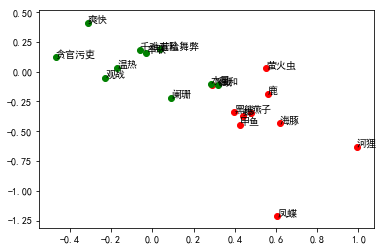

In [40]:
file_name = f'./pics/animals_viusal_2d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
plt.scatter(animals_sample_wv[:,0], animals_sample_wv[:,1], c='r')
plt.scatter(common_sample_wv[:,0], common_sample_wv[:,1], c='g')
for i in range(len(animals_sample_wv)):
    plt.text(animals_sample_wv[i,0], animals_sample_wv[i,1], animals_sample[i])
    plt.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample[i])
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

Picture has been saved as ./pics/animals_viusal_3d_210403_1638.png.


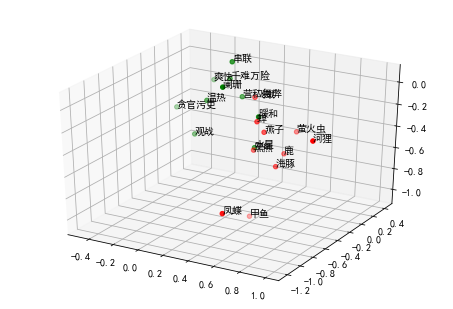

In [41]:
from mpl_toolkits.mplot3d import Axes3D

file_name = f'./pics/animals_viusal_3d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig = plt.figure()
ax = Axes3D(fig)
for i in range(10):
    ax.text(animals_sample_wv[i,0], animals_sample_wv[i,1], animals_sample_wv[i,2], animals_sample[i])
    ax.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample_wv[i,2], common_sample[i])
ax.scatter(animals_sample_wv[:,0], animals_sample_wv[:,1], animals_sample_wv[:,2], c='r')
ax.scatter(common_sample_wv[:,0], common_sample_wv[:,1], common_sample_wv[:,2], c='g')
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()